# Assignment 5

## 1. Choose a REGRESSION dataset (reusing bikeshare is allowed), perform a test/train split, and build a regression model (just like in assignment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)
## 2. Choose a CLASSIFICATION dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classifcation Report
    
## 3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

# Regression Model: determine the effects of Credit Rating

In [98]:
# import packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14

In [100]:
# import credit from data folder: get working directory

# get wd
os.getcwd()


'/Users/alexyerg/Desktop/Johns Hopkins/MLNN/mlnn-main/05'

### Import/Explore data

In [120]:
# import credit data
credit = pd.read_csv('/Users/alexyerg/Desktop/Johns Hopkins/MLNN/mlnn-main/data/Credit.csv')

# Explore data 
credit.isnull().sum() # check for null values: NO nulls
credit.describe() # see summary stats
credit.info() # see data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0    400 non-null int64
Income        400 non-null float64
Limit         400 non-null int64
Rating        400 non-null int64
Cards         400 non-null int64
Age           400 non-null int64
Education     400 non-null int64
Gender        400 non-null object
Student       400 non-null object
Married       400 non-null object
Ethnicity     400 non-null object
Balance       400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [137]:
credit.describe() 

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


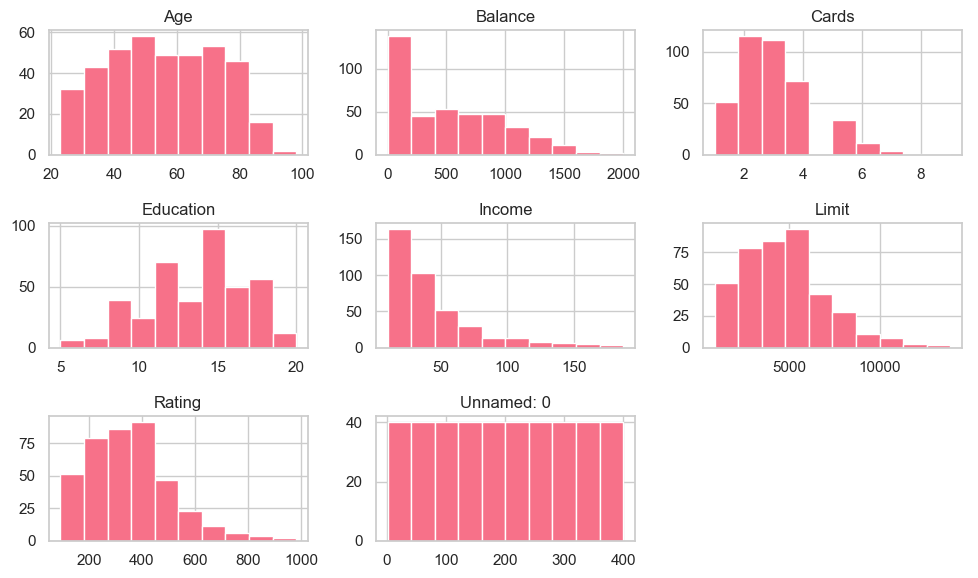

In [121]:
# Check Distribution of numeric variables
credit.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

In [139]:
# Check Distribution of numeric variables
# credit.boxplot(figsize=(8, 6))
# plt.tight_layout()
# plt.show()

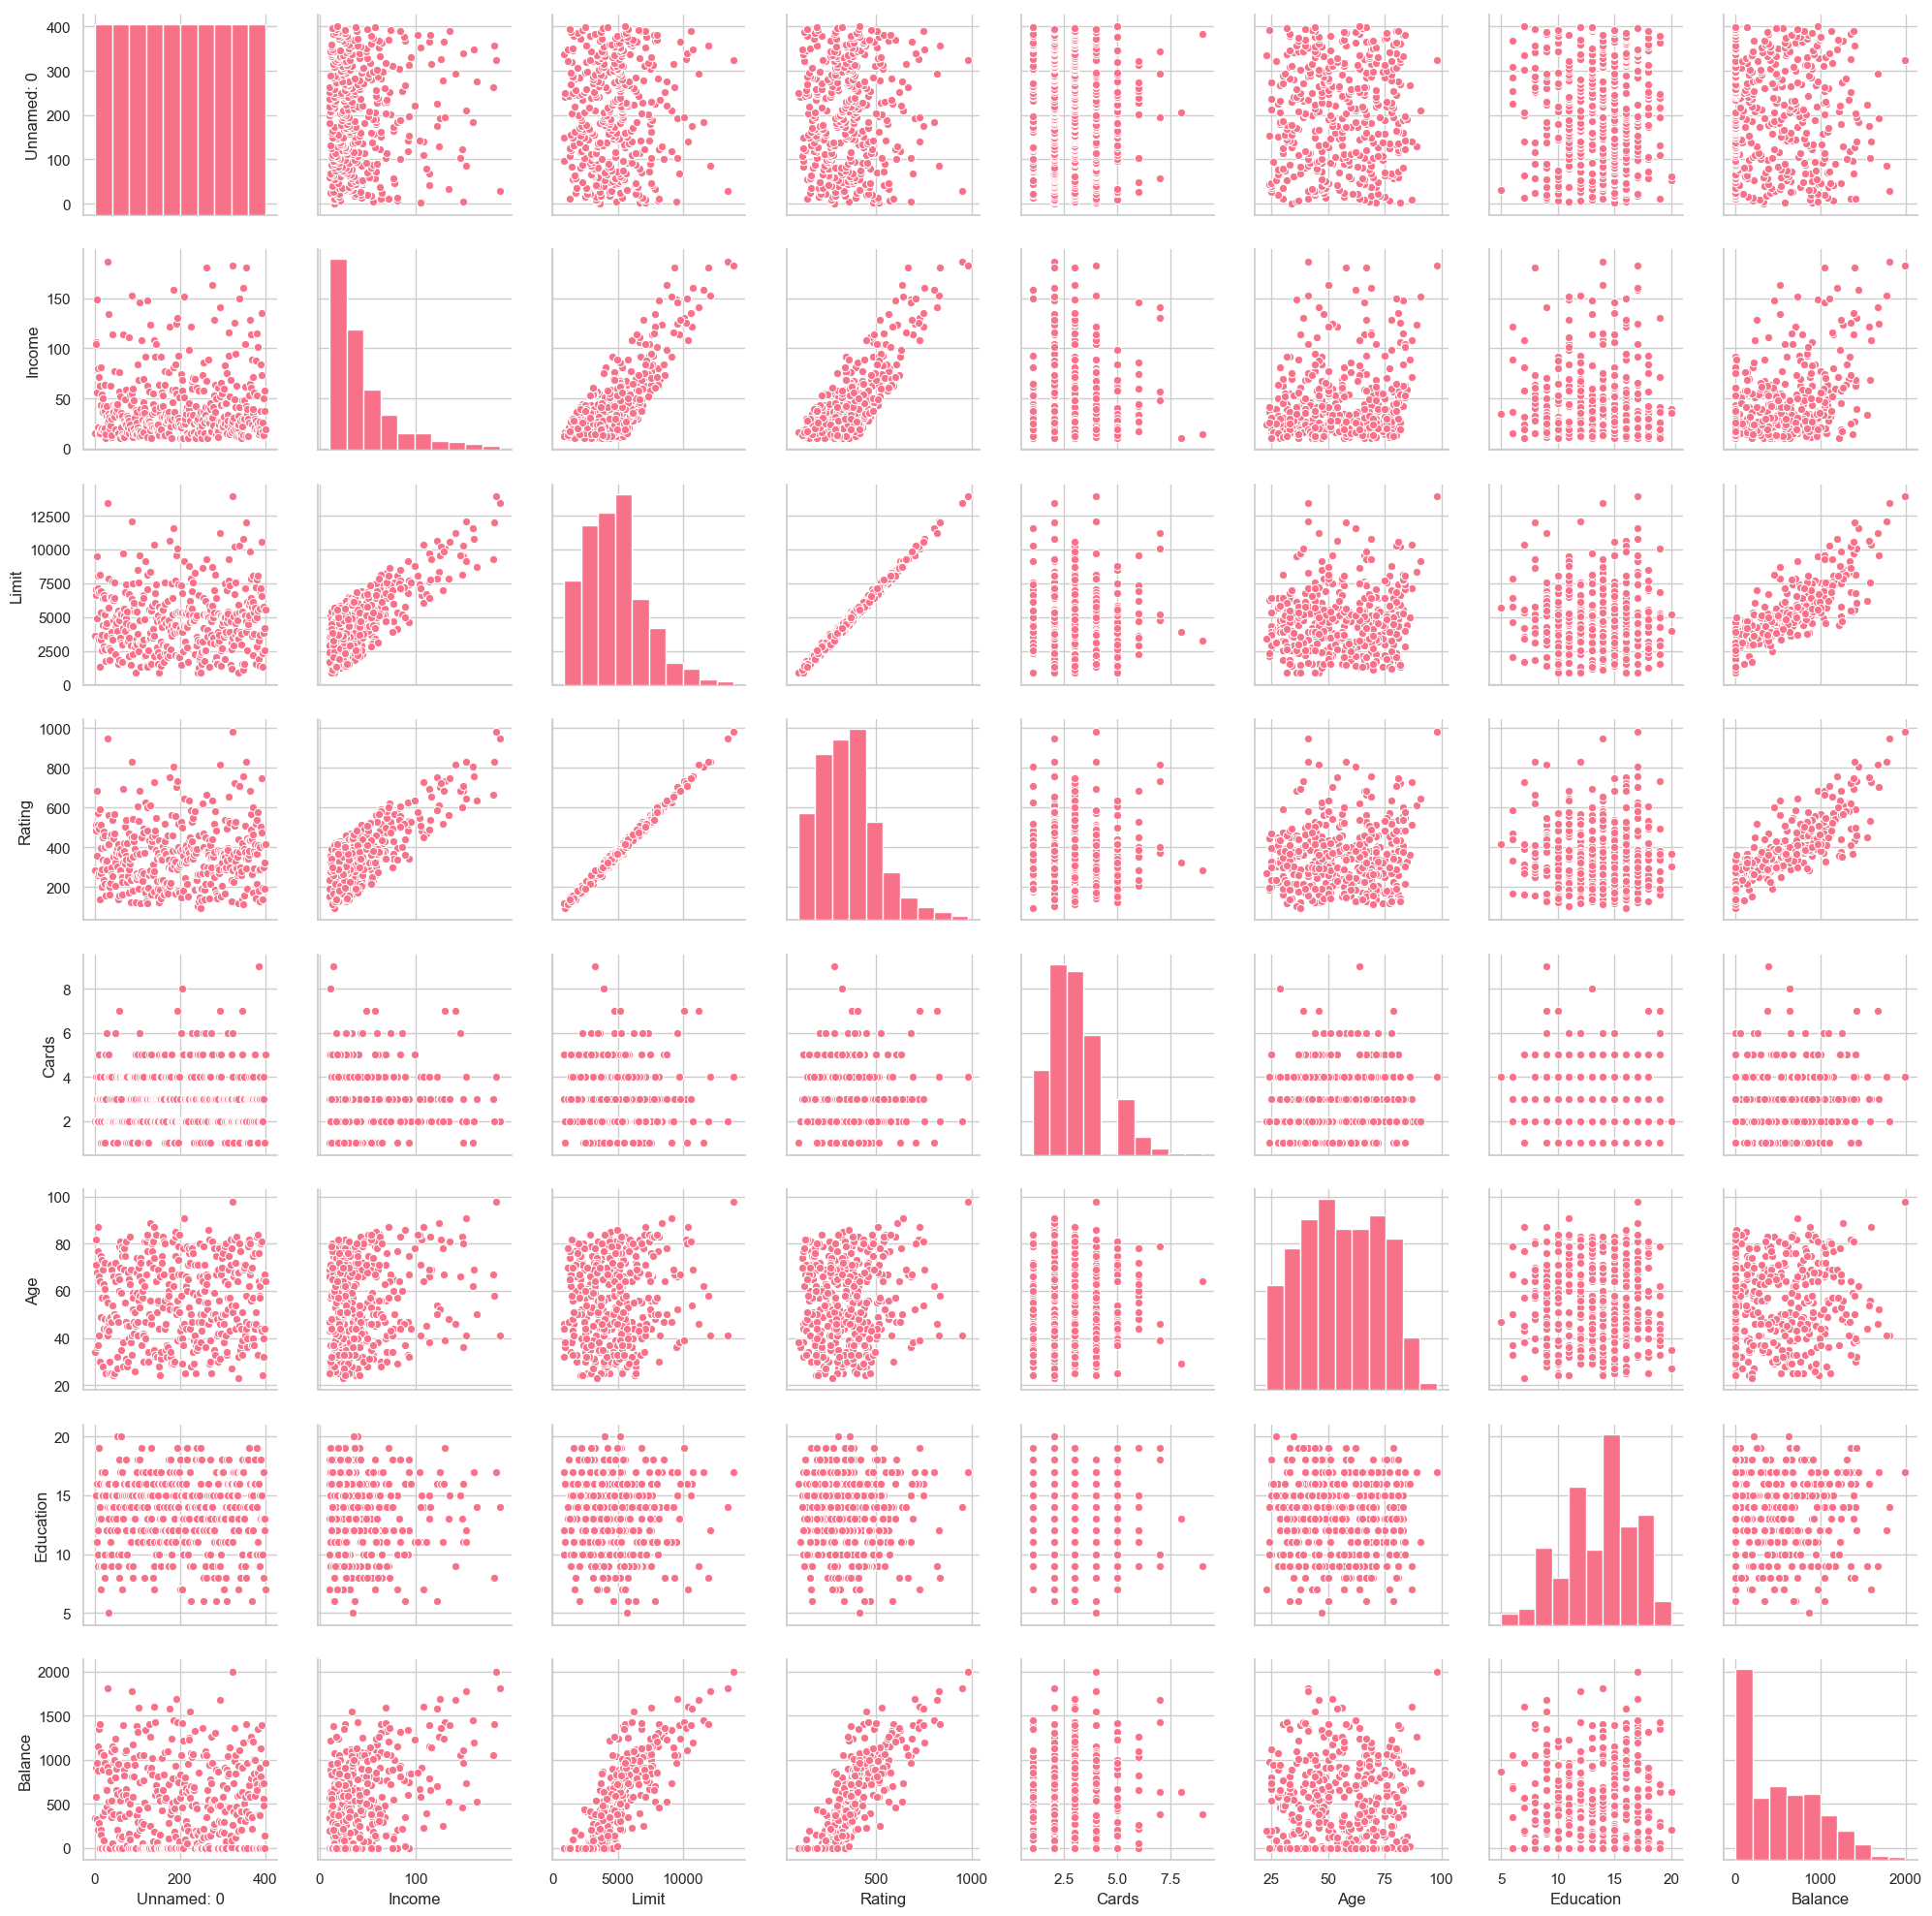

In [126]:
# check distribution and collinearity
sns.pairplot(credit)
plt.show()

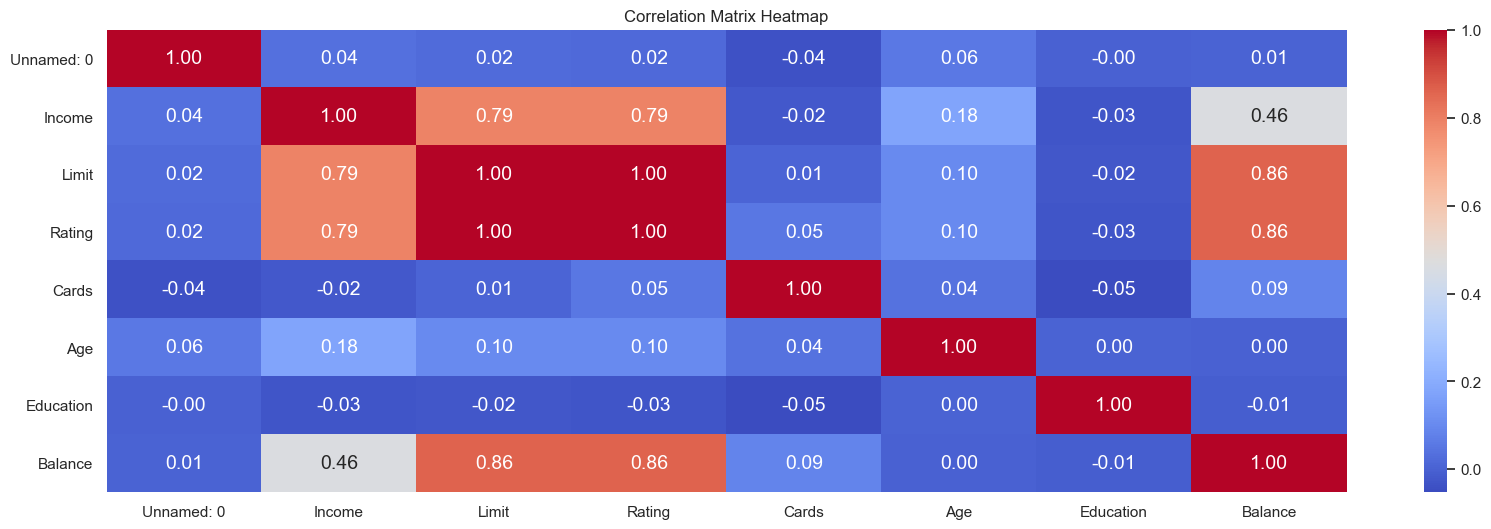

In [123]:
# check for perfect collinearity: Limit is perfectly collinear to Rating
correlation_matrix = credit.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

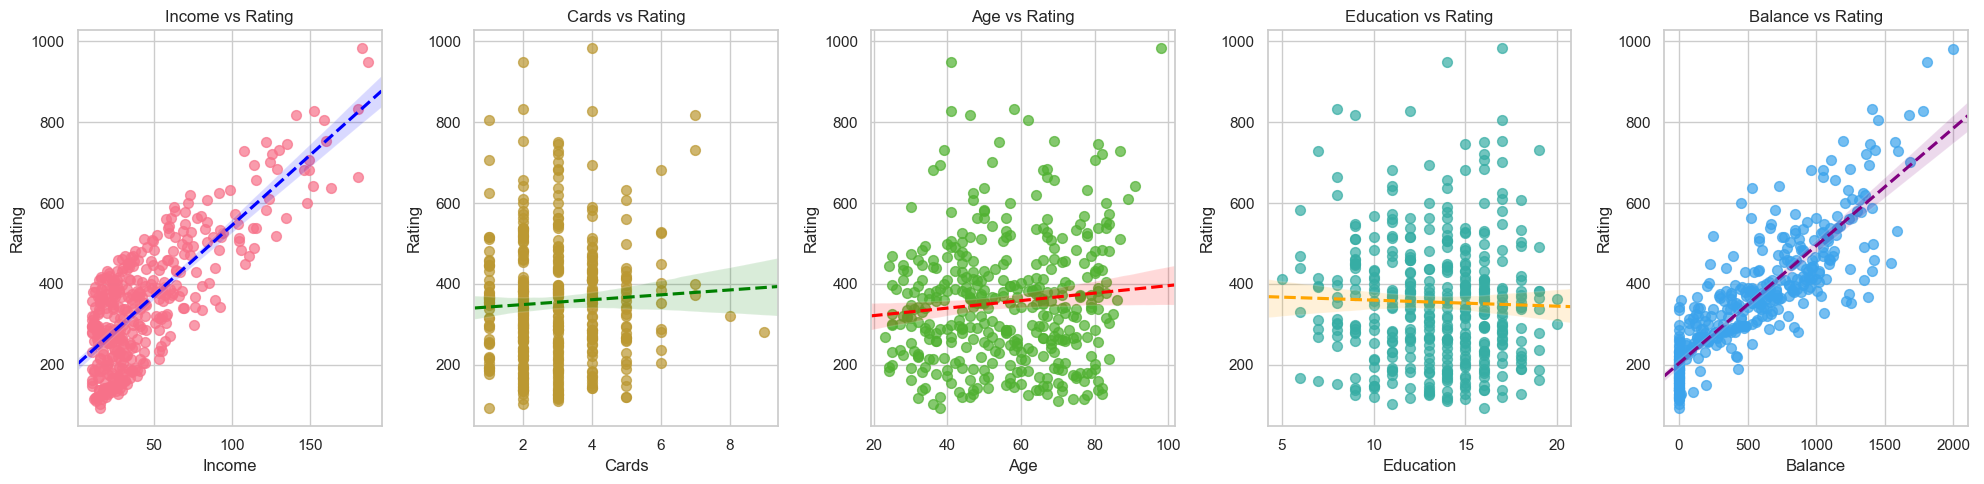

In [133]:
# Plot relationships between each indep variable to dep var

# set format
sns.set(style="whitegrid")
sns.set_palette("husl")

# create list of var and colors
independent_vars = ['Income', 'Cards', 'Age', 'Education', 'Balance']
colors = ['blue', 'green', 'red', 'orange', 'purple']

# set subplot sizes
fig, axes = plt.subplots(1, len(independent_vars), figsize=(20, 5))

# iterate 
for i, var in enumerate(independent_vars):
    sns.regplot(x=var, y='Rating', data=credit, scatter_kws={'alpha': 0.7, 's': 50},
                line_kws={'color': colors[i], 'linestyle': '--'}, ax=axes[i])
    
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Rating')
    axes[i].set_title(f'{var} vs Rating')

# show
plt.tight_layout()
plt.show()


### Setup Model using Linear Regression: Determine what effects Credit Rating using only numeric variables

In [135]:
# Extract features and target from df
# ! NOTE: Excluded the variable Limit due to being perfectly collinear
X = credit[['Income', 'Cards', 'Age', 'Education', 'Balance']]  # Independent variables
y = credit['Rating']  # Dependent variable

In [136]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# print the coefficients
print(linreg.intercept_, linreg.coef_)

143.56482237053734 [ 2.16820623  0.52335208  0.15423969 -0.72490883  0.21647112]


### Interpretation of Coefficients

Based on the coefficients from our regression model, for every $1k dollars increase results in an Credit Rating increase of ~2.17; for every additional credit card results in an increase in Credit Rating of ~0.52; for every 1 year older results in a rating increase of 0.15; for every additional year of education results in a decrease of rating by ~0.72; and for every 1 dollar in (checking or savings?) account results in a 0.216 rating increase.  

### Evaluate Model

In [138]:
# Predict on the training and testing data
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Calculate training and testing errors using MAE and MSE
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

Training MAE: 29.935380769894117
Testing MAE: 28.80386921282054
Training MSE: 1416.0692797732595
Testing MSE: 1400.2921073828772


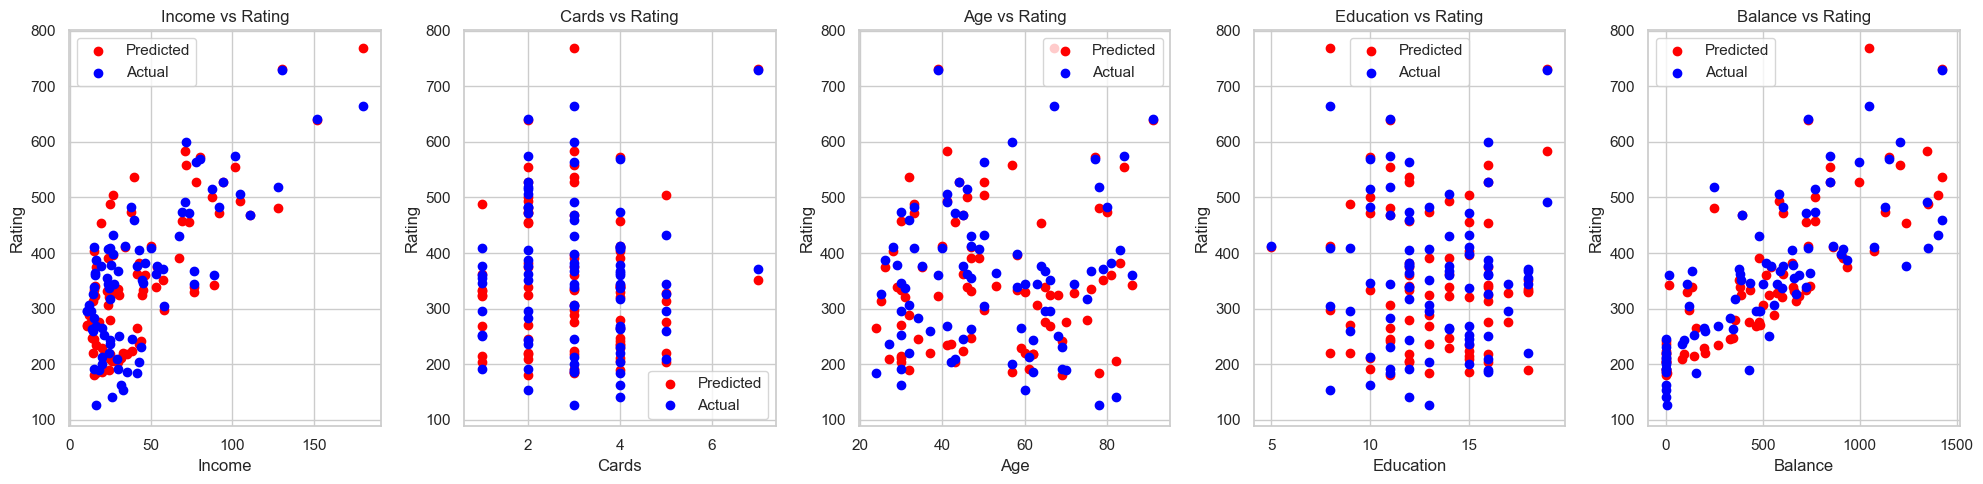

In [141]:
# Evaluate the model visually

sns.set(style="whitegrid")
sns.set_palette("husl")

# create list of independent variables
independent_vars = ['Income', 'Cards', 'Age', 'Education', 'Balance']

# set subplot sizes
fig, axes = plt.subplots(1, len(independent_vars), figsize=(20, 5))

# iterate through independent variables
for i, var in enumerate(independent_vars):
    # scatter plot: model (red)
    axes[i].scatter(X_test[var], y_test_pred, c='red', label='Predicted')

    # scatter plot: actual (blue)
    axes[i].scatter(X_test[var], y_test, c='blue', label='Actual')

    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Rating')
    axes[i].set_title(f'{var} vs Rating')
    axes[i].legend()

# show
plt.tight_layout()
plt.show()

# Classification Model (Decision Tree): using Credit data, determine if the consumer will be married

In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )

### Train & Fit Decision Tree Classifier: target = Married

In [154]:
# prep the data
X_clf = credit[['Income', 'Cards', 'Age', 'Education', 'Balance', 'Rating']]  # numeric features 
y_clf = credit['Married']  # target 

# train-test split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# create/fit model: Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_clf, y_train_clf)

### Evaluate the Model: Classification Report, Confusion Matrix, Accuracy Score

In [157]:
# Classification Report
y_pred_clf = clf.predict(X_test_clf)
print(classification_report(y_test_clf, y_pred_clf))

              precision    recall  f1-score   support

          No       0.33      0.43      0.38        28
         Yes       0.64      0.54      0.58        52

    accuracy                           0.50        80
   macro avg       0.48      0.48      0.48        80
weighted avg       0.53      0.50      0.51        80



In [159]:
# Confustion Matrix
confusion_matrix(y_test_clf, y_pred_clf)

array([[12, 16],
       [24, 28]])

In [160]:
# Accuracy Score
accuracy_score(y_test_clf, y_pred_clf)

0.5

# Bonus: Improve the model w/Tuning HyperParameters

In [162]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their values to search
param_grid = {
    'max_depth': [None, 10, 20, 30],  # max depth of the tree
    'min_samples_split': [2, 5, 10],   # min # of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # min # of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']   # func to measure the quality of a split
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)
grid_search.fit(X_train_clf, y_train_clf)

# get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_clf = grid_search.best_estimator_
y_pred_clf = best_clf.predict(X_test_clf)

# Accuracy Score
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print("Accuracy Score:", accuracy)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy Score: 0.525
